=================================================================================================================

# MACHINE LEARNING

## HOMEWORK 2

### VIOLET TIEMA

### February 2019


=================================================================================================================

In [70]:
import numpy as np
from pandas import *
import pandas as pd
from numpy import linalg
from sklearn.svm import SVR
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


%matplotlib inline


# Opening and reading in the scaled Boston Housing data

In [2]:
file = open("house_scale.txt")
file = file.read()

# Removing the "digit:" characters from the txt file

file = file.replace("1:", "").replace("2:", "").replace("3:", "")
file = file.replace("4:", "").replace("5:", "").replace("6:", "")
file = file.replace("7:", "").replace("8:", "").replace("9:", "")
file = file.replace("10:", "").replace("13:", "")

# writing the transformed text to a new txt file
    
f = open("HA.txt", "w")

f.write(file)

f.close()

# Creating a pandas Dataframe for the scaled bousing data

In [3]:
df = pd.read_csv('HA.txt', sep = " ", header = None)
df = df.drop([14], axis = 1)


# removing unwanted digits from some of the columns of the dataframe and 
# converting the elements of each column from strings to floats
# We also replace all the NaN values by zeros


df[11] = df[11].map(lambda x: x.lstrip('1').rstrip('aAbBcC'))
df[13] = df[13].map(lambda x: x.lstrip('1').rstrip('aAbBcC'))
df[12] = df[12].map(lambda x: str(x)[1:])
df["TARGET"] = df[0]
df = df.drop([0], axis = 1)

df[1] = df[1].astype(float)
df[2] = df[2].astype(float)
df[3] = df[3].astype(float)
df[4] = df[4].astype(float)
df[5] = df[5].astype(float)
df[6] = df[6].astype(float)
df[7] = df[7].astype(float)
df[8] = df[8].astype(float)
df[9] = df[9].astype(float)
df[10] = df[10].astype(float)
df[11] = pd.to_numeric(df[11]).fillna(0.0)
df[12] = df[12].astype(float)
df[13] = pd.to_numeric(df[13]).fillna(0.0)
df["TARGET"] = df["TARGET"].astype(float)



In [4]:
# The first five rows of the data

df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,TARGET
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,24.0
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,21.6
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,34.7
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,33.4
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,36.2


In [5]:
# Gives a general idea of the data 

df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000
mean,-0.918912,-0.772727,-0.217245,-0.861660,-0.301666,0.043738,0.352727,-0.515237,-0.256573,-0.155583,2.419056e-01,0.797136,-0.399158,22.532806
std,0.193359,0.466449,0.502958,0.507988,0.476863,0.269254,0.579791,0.382964,0.757153,0.643271,4.584192e-01,0.460411,0.389559,9.197104
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,5.000000
25%,-0.998298,-1.000000,-0.653226,-1.000000,-0.736626,-0.109216,-0.132338,-0.823482,-0.739130,-0.648855,5.551125e-17,0.891459,-0.711920,17.025000
50%,-0.994376,-1.000000,-0.323314,-1.000000,-0.370370,0.014562,0.536560,-0.622103,-0.652174,-0.454198,3.617020e-01,0.972465,-0.468543,21.200000
75%,-0.917483,-0.750000,0.293255,-1.000000,-0.016461,0.173596,0.877961,-0.261823,1.000000,0.828244,6.170210e-01,0.996596,-0.159768,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.297870e-01,1.000000,0.945364,50.000000


In [6]:
# We load all the columns except the target as the X inputs and the Target Y as the outputs.

newX = df.drop("TARGET", axis = 1)
print("size of the inputs is:", newX.shape)  

# These are the class labels  # pandas core frame

newY = df["TARGET"]
print("size of the target is:",newY.shape)           

size of the inputs is: (506, 13)
size of the target is: (506,)


# QUESTION 1 : SOLUTION TO THE RIDGE REGRESSION AND LASSO

### Ridge Regression

Ridge Regression uses L2 Regualtion to regularize the regression.

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

Notice that when the lambda value is zero, the solution is identical to ordinary least squares:

In [7]:


def TheRidge(x,y, alpha):
    """
    This function calculates the optimal solution of the Ridge regression problem
    x : inputs as a mtrix
    y : targets as a vector
    alpha : regularization parameter
    returns the optimal weights and the mean Squared error
    """
    x = np.matrix(x)
    y = np.matrix(y).transpose()
    QTQ = x.transpose() * x
    QTY = x.transpose() * y
    alphaI = alpha * np.matrix(np.identity(len(QTQ)))
    alphaI[0,0] = 0
    beta = linalg.inv(QTQ - alphaI) * QTY
    y_hat = np.dot(x, beta)
    residuals = y_hat - y
    SSE = residuals.transpose() * residuals
    MSE = SSE/len(newX)
    print("The optimal solution for the Ridge for alpha =",alpha," are:")
    print(beta,"\n")
    #print("The MSE for alpha =",alpha,"is:" , MSE)
    
alpha = 1000    
ridge = TheRidge(newX, newY, alpha)


The optimal solution for the Ridge for alpha = 1000  are:
[[-24.82217801]
 [ -2.46498409]
 [  2.77447353]
 [ -0.8616968 ]
 [  2.3917889 ]
 [ -1.29343499]
 [  3.03331311]
 [ -1.90237242]
 [  3.4422102 ]
 [  3.41473949]
 [  2.22050927]
 [ -1.03715351]
 [  2.19245893]] 



### Lasso Regression

Lasso Regression uses L1 Regualtion to regularize the regression.

The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. 
Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.


In [8]:
n = newX.shape[0]    # number of training examples
alpha = 1000 / n
#lasso = Lasso(alpha, positive = True).fit(newX, newY)
lasso = Lasso(alpha).fit(newX, newY)

print("The optimal solutions for Lasso are:")

for i in lasso.coef_:
    print(float(i))



The optimal solutions for Lasso are:
-0.0
0.0
-0.0
0.0
-0.0
0.0
-0.0
0.0
-0.0
-0.6368917487410626
-0.0
0.0
-3.8853204319042174


# QUESTION 2 : 
# TRAINING AND TESTING ERROR WITH DIFFERENT VALUES OF $\lambda$

#### Split the data into train and test sets

We take the first 400 examples as training data and remaining 106 examples as testing data.
We will first start with the ridge then work on the Lasso. 

In [9]:
# The ridge

n = 400                     # number of training examples
X_train = newX[:n]
X_test = newX[n:]
Y_train = newY[:n]
Y_test = newY[n:]


print("Training and testing split was successful!!!")

print("\n")

print("size of the training data is:", X_train.shape)
print("size of the training class label is:", Y_train.shape)
print("size of the testing data is:", X_test.shape)
print("size of the testing class label is:", Y_test.shape)

Training and testing split was successful!!!


size of the training data is: (400, 13)
size of the training class label is: (400,)
size of the testing data is: (106, 13)
size of the testing class label is: (106,)


## Ridge Regression

In [10]:
print("FOR THE TRAINING DATA")

from sklearn.linear_model import Ridge



lambda_settings = [0, 0.01, 0.1, 1, 10, 100, 1000]


for alpha in lambda_settings: 
                   
    # build the model
    ridge = TheRidge(X_train, Y_train, alpha)
    print(" ")


FOR THE TRAINING DATA
The optimal solution for the Ridge for alpha = 0  are:
[[-16.65415722]
 [  1.90281806]
 [  0.68016262]
 [  0.46619437]
 [ -4.02844654]
 [ 12.48246583]
 [  0.3081996 ]
 [ -8.16298104]
 [  6.06974301]
 [ -3.39182294]
 [ -4.07793512]
 [  2.00221865]
 [ -9.83772212]] 

 
The optimal solution for the Ridge for alpha = 0.01  are:
[[-16.65389027]
 [  1.90383595]
 [  0.68241908]
 [  0.46574376]
 [ -4.0312386 ]
 [ 12.48589978]
 [  0.30816347]
 [ -8.16626141]
 [  6.07326576]
 [ -3.39535312]
 [ -4.07826418]
 [  2.00098148]
 [ -9.83829833]] 

 
The optimal solution for the Ridge for alpha = 0.1  are:
[[-16.65166495]
 [  1.91306501]
 [  0.70289485]
 [  0.46165673]
 [ -4.05657698]
 [ 12.51694437]
 [  0.30782405]
 [ -8.19594448]
 [  6.1052634 ]
 [ -3.42742933]
 [ -4.08124782]
 [  1.98966068]
 [ -9.84339478]] 

 
The optimal solution for the Ridge for alpha = 1  are:
[[-16.64938555]
 [  2.01262231]
 [  0.92577801]
 [  0.4173617 ]
 [ -4.33274722]
 [ 12.84213625]
 [  0.30291329]
 [

In [11]:
print("FOR THE TESTING DATA \n")
from sklearn.linear_model import Ridge


test_accuracy = []


for alpha in lambda_settings:
    
    # build the model   
    ridge = Ridge(alpha).fit(X_test, Y_test)
    
    # record generalization accuracy
    test_accuracy.append(ridge.score(X_test, Y_test))
    
    print("The Optimal solutions for alpha =",alpha,"are",ridge.coef_ )
    print(" ")


    
#print("Testing Accuracy")  
#for i in test_accuracy:
    #print(i)    
    

FOR THE TESTING DATA 

The Optimal solutions for alpha = 0 are [-8.59678634  2.06429812  0.85349614  0.84693769 -3.65239073 12.80822745
  0.19909808 -7.1344806   5.52508025 -4.05358326 -3.8801391  -0.29741976
 -9.81042243]
 
The Optimal solutions for alpha = 0.01 are [-8.57355351  2.06317554  0.85098359  0.84788629 -3.64919832 12.80306277
  0.19948902 -7.13075729  5.51841965 -4.05033874 -3.87975376 -0.29519911
 -9.81219195]
 
The Optimal solutions for alpha = 0.1 are [-8.36986746  2.05318716  0.82861115  0.85628382 -3.62084361 12.75719412
  0.20285612 -7.09759854  5.45954899 -4.02140935 -3.87636613 -0.27552565
 -9.82733682]
 
The Optimal solutions for alpha = 1 are [-6.75734892  1.96315816  0.62572036  0.92891256 -3.36905793 12.34795578
  0.22475677 -6.79534106  4.95804362 -3.7567604  -3.8488385  -0.10543843
 -9.91764752]
 
The Optimal solutions for alpha = 10 are [-2.31616451  1.50593808 -0.43795355  1.26164756 -2.14494404  9.96521667
  0.14349288 -4.9891854   2.86766036 -2.39267775 -

## To calculate the Mean Squared error on the training and testing data

In [12]:
# We make preduictions first
predictions = ridge.predict(X_test)
print('MSE: ',metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MSE:  65.42863216395239
RMSE:  8.088796706800856


## Plotting the RMSE curves for the different values of lambda

In [13]:
# calculating the errors for all the lambda values
from sklearn.linear_model import Ridge

MSEs = []
RMSEs = []

training_accuracy = []
test_accuracy = []

TR_accuracy = []
TE_accuracy = []


for alpha in lambda_settings:
    
    # build the model 
    ridge = Ridge(alpha)
    ridge.fit(X_train, Y_train)
    predictions = ridge.predict(X_test)
    
    MSEs.append(metrics.mean_squared_error(Y_test, predictions))
    RMSEs.append(np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
    
    # record training accuracy
    TR_accuracy.append((alpha, ridge.score(X_train, Y_train)))
    training_accuracy.append( ridge.score(X_train, Y_train))
    
    # record generalization accuracy
    TE_accuracy.append((alpha, ridge.score(X_test, Y_test)))
    test_accuracy.append( ridge.score(X_test, Y_test))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


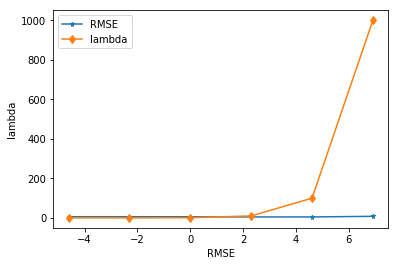

In [15]:
print("Training Accuracy") 
for i in TR_accuracy:
    print("for alpha =", i[0],":",i[1])   
    

print(" ")

print("Testing Accuracy")
for i in TE_accuracy:
    print("for alpha =", i[0],":", i[1])    


Training Accuracy
for alpha = 0 : 0.7400622234052615
for alpha = 0.01 : 0.740062121454276
for alpha = 0.1 : 0.7400523716587837
for alpha = 1 : 0.7393273442861921
for alpha = 10 : 0.7180887202569366
for alpha = 100 : 0.507040661257711
for alpha = 1000 : 0.16198975612805444
 
Testing Accuracy
for alpha = 0 : -0.3086210863391594
for alpha = 0.01 : -0.3070162730047419
for alpha = 0.1 : -0.2929687922587423
for alpha = 1 : -0.18243660892045566
for alpha = 10 : 0.1554375448284402
for alpha = 100 : 0.12267944973861156
for alpha = 1000 : -1.3154564020464705


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


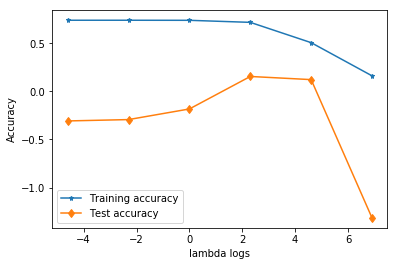

In [16]:
# Plotting the accuracy values

plt.plot(np.log(np.array(lambda_settings)),
         training_accuracy, label = "Training accuracy", marker = '*', markersize = 5 )
plt.plot(np.log(np.array(lambda_settings)),
        test_accuracy, label = "Test accuracy", marker = 'd', markersize = 6)
plt.ylabel("Accuracy")
plt.xlabel("lambda logs")
plt.legend()

# Lasso Regression

In [17]:
print("FOR THE DATA \n")

test_accuracy = []


for alpha in lambda_settings:
    alpha2 = alpha / n
    
    # build the model   
    lasso = Lasso(alpha2).fit(X_train, Y_train)
    
    # record generalization accuracy
    test_accuracy.append(lasso.score(X_test, Y_test))
    
    print("The Optimal solutions for alpha =",alpha,"are",lasso.coef_ )
    print(" ")


    
#print("Testing Accuracy")  
#for i in test_accuracy:
    #print(i)    
    

FOR THE DATA 

The Optimal solutions for alpha = 0 are [-8.59678634  2.06429812  0.85349614  0.84693769 -3.65239073 12.80822745
  0.19909808 -7.1344806   5.52508025 -4.05358326 -3.8801391  -0.29741976
 -9.81042243]
 
The Optimal solutions for alpha = 0.01 are [-8.59400164  2.06390952  0.85274859  0.84701593 -3.65127959 12.80804394
  0.19883694 -7.1338846   5.52371235 -4.05257307 -3.87990976 -0.29638876
 -9.81045858]
 
The Optimal solutions for alpha = 0.1 are [-8.56896847  2.0605277   0.84585482  0.8477135  -3.64123871 12.80619876
  0.19658815 -7.12865977  5.51144877 -4.04352451 -3.87780234 -0.28712507
 -9.81089684]
 
The Optimal solutions for alpha = 1 are [-8.3177473   2.02573634  0.7783301   0.85475923 -3.54043194 12.78921117
  0.17336631 -7.07477715  5.38810867 -3.95274052 -3.8569543  -0.19401396
 -9.81474175]
 
The Optimal solutions for alpha = 10 are [-5.81164952  1.68681064  0.08910307  0.91943331 -2.70404909 12.6836447
  0.         -6.54578117  4.24212914 -3.1007476  -3.6298244

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
# We make preduictions first

predictions = lasso.predict(X_test)
print('MSE: ',metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MSE:  102.22658647641512
RMSE:  10.110716417564836


In [19]:
# calculating the errors for all the lambda values

n = 400
MSEs = []
RMSEs = []

training_accuracy = []
test_accuracy = []

TR_accuracy = []
TE_accuracy = []

# try alpha from 0 to 1000
alpha_settings = [0, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_settings:
    alpha2 = alpha / n
    
    # build the model
    lasso = Lasso(alpha2, max_iter = 10000000)
    lasso.fit(X_train, Y_train)
    
    predictions = lasso.predict(X_test)
    
    MSEs.append(metrics.mean_squared_error(Y_test, predictions))
    RMSEs.append(np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
    
    
    # record training accuracy
    training_accuracy.append(lasso.score(X_train, Y_train))
    TR_accuracy.append((alpha,lasso.score(X_train, Y_train)))
    
    # record generalization accuracy
    test_accuracy.append(lasso.score(X_test, Y_test))
    TE_accuracy.append((alpha,lasso.score(X_test, Y_test)))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [20]:
print("Training Accuracy") 
for i in TR_accuracy:
    print("for alpha =", i[0],":",i[1])   
    

print(" ")

print("Testing Accuracy")
for i in TE_accuracy:
    print("for alpha =", i[0],":", i[1])    

Training Accuracy
for alpha = 0 : 0.7400622234052616
for alpha = 0.01 : 0.7400622205359673
for alpha = 0.1 : 0.7400619373787123
for alpha = 1 : 0.7400334247552917
for alpha = 10 : 0.7376408113610479
for alpha = 100 : 0.6819326074238766
for alpha = 1000 : 0.0
 
Testing Accuracy
for alpha = 0 : -0.308621086339663
for alpha = 0.01 : -0.30827822941861815
for alpha = 0.1 : -0.30519604407269973
for alpha = 1 : -0.27476948614761487
for alpha = 10 : -0.14993942486347156
for alpha = 100 : -0.06294799657102845
for alpha = 1000 : -2.6177006348389167


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


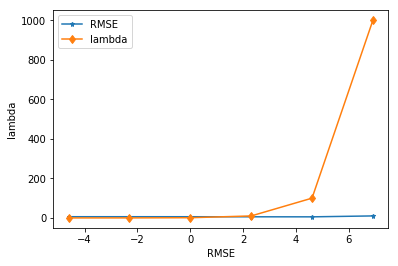

In [21]:
# Plot the accuracy values

plt.plot(np.log(np.array(lambda_settings)),
         RMSEs, label = "RMSE", marker = '*', markersize = 5)
plt.plot(np.log(np.array(lambda_settings)),
        lambda_settings, label = "lambda", marker = 'd', markersize = 6)

plt.ylabel("lambda")
plt.xlabel("RMSE")
plt.legend()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


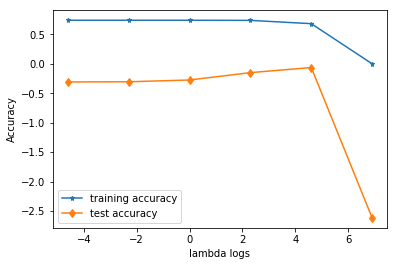

In [22]:
# Plotting the accuracy values

plt.plot(np.log(np.array(lambda_settings)),
         training_accuracy, label = "training accuracy", marker = '*', markersize = 5 )
plt.plot(np.log(np.array(lambda_settings)),
        test_accuracy, label = "test accuracy", marker = 'd', markersize = 6)
plt.ylabel("Accuracy")
plt.xlabel("lambda logs")
plt.legend()

# QUESTION 3 : CROSS VALIDATION

In [31]:
# We use Grid search cross validation function to find the best lambda value.
# We work on the training examples only

lasso = Lasso()

parameters = {'alpha': [0, 0.01, 0.1, 1, 10, 100, 1000]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5, verbose = 0)

lasso_regressor.fit(X_train, Y_train)


# print out the best lambda value for the model


print("The best lambda value for Lasso is:", lasso_regressor.best_params_['alpha'])
print("The best score is:",lasso_regressor.best_score_)

print(" ")

predictions = lasso_regressor.predict(X_test)
print('MSE: ',metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/pyt

The best lambda value for Lasso is: 0.1
The best score is: -39.1411095171568
 
MSE:  31.22078090273648
RMSE:  5.587555897057002


In [37]:
from sklearn.linear_model import Ridge


Ridge = Ridge()

parameters = {'alpha': [0, 0.01, 0.1, 1, 10, 100, 1000]}

Ridge_regressor = GridSearchCV(Ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)

Ridge_regressor.fit(X_train, Y_train)

# print out the best lambda value for the model

print("The best lambda value for Ridge is:", Ridge_regressor.best_params_['alpha'])
print("The best score is:",Ridge_regressor.best_score_)

print(" ")

predictions = Ridge_regressor.predict(X_test)
print('MSE: ',metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


The best lambda value for Ridge is: 10
The best score is: -33.26075791951155
 
MSE:  23.865086023673488
RMSE:  4.885190479773894


# QUESTION 4 : NONSCALED BOSTON HOUSING DATA

### Preprocessing the data

    We load the file
    Remove all the unwated charachets of the form "digit:"
    We write our new transformed data into a new file
    We load the data into a pandas DataFrame
    We change all column data types to float for ease of manipulation
    We label the output column as the target
    
    

In [78]:
# Loading file and transforming the data

file = open("house.txt")
file = file.read()


f.close()

# Removing the "digit:" characters from the txt file

file = file.replace("1:", "").replace("2:", "").replace("3:", "")
file = file.replace("4:", "").replace("5:", "").replace("6:", "")
file = file.replace("7:", "").replace("8:", "").replace("9:", "")
file = file.replace("10:", "").replace("13:", "")

# writing the transformed text to a new txt file
    
f = open("YAAAAY.txt", "w")

f.write(file)





42307

In [85]:
df = pd.read_csv('YAAAAY.txt', sep = " ", header = None)
#df = df.drop([14], axis = 1)
 
# removing unwanted digits from some of the columns of the dataframe and 
# converting the elements of each column from strings to floats
# We also replace all the NaN values by zeros




In [86]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,115.3,1396.90,14.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,117.8,1396.90,19.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,117.8,1392.83,14.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,118.7,1394.63,12.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,118.7,1396.90,15.33


In [89]:
df["TARGET"] = df[0]
df = df.drop([0], axis = 1)




In [ ]:
df[1] = df[1].astype(float)
df[2] = df[2].astype(float)
df[3] = df[3].astype(float)
df[4] = df[4].astype(float)
df[5] = df[5].astype(float)
df[6] = df[6].astype(float)
df[7] = df[7].astype(float)
df[8] = df[8].astype(float)
df[9] = df[9].astype(float)
df[10] = df[10].astype(float)
df[11] = pd.to_numeric(df[11]).fillna(0.0)
df[12] = df[12].astype(float)
df[13] = pd.to_numeric(df[13]).fillna(0.0)
df["TARGET"] = df["TARGET"].astype(float)

In [90]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,115.3,1396.90,14.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,117.8,1396.90,19.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,117.8,1392.83,14.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,118.7,1394.63,12.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,118.7,1396.90,15.33,36.2


### We create inputs and outputs and then split the data into train and test sets

In [91]:
# We load all the columns except the target as the X inputs and the Target Y as the outputs.

newX = df.drop("TARGET", axis = 1)
print("size of the inputs is:", newX.shape)  

# These are the class labels  # pandas core frame

newY = df["TARGET"]
print("size of the target is:",newY.shape)  


n = 400                     # number of training examples
X_train = newX[:n]
X_test = newX[n:]
Y_train = newY[:n]
Y_test = newY[n:]


print("\n")


print("Training and testing split was successful!!!")

print("\n")

print("size of the training data is:", X_train.shape)
print("size of the training class label is:", Y_train.shape)
print("size of the testing data is:", X_test.shape)
print("size of the testing class label is:", Y_test.shape)

size of the inputs is: (506, 13)
size of the target is: (506,)


Training and testing split was successful!!!


size of the training data is: (400, 13)
size of the training class label is: (400,)
size of the testing data is: (106, 13)
size of the testing class label is: (106,)


In [92]:
# We use Grid search cross validation function to find the best lambda value.
# We work on the training examples only


lasso = Lasso()

parameters = {'alpha': [0, 0.01, 0.1, 1, 10, 100, 1000]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5, verbose = 0)

lasso_regressor.fit(X_train, Y_train)


# print out the best lambda value for the model


print("The best lambda value for Lasso is:", lasso_regressor.best_params_['alpha'])
print("The best score is:",lasso_regressor.best_score_)

print(" ")

predictions = lasso_regressor.predict(X_test)
print('MSE: ',metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/pyt

The best lambda value for Lasso is: 1
The best score is: -46.05559350354067
 
MSE:  22.751501809506546
RMSE:  4.76985343689998


In [93]:
# Ridge

from sklearn.linear_model import Ridge


Ridge = Ridge()

parameters = {'alpha': [0, 0.01, 0.1, 1, 10, 100, 1000]}

Ridge_regressor = GridSearchCV(Ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)

Ridge_regressor.fit(X_train, Y_train)

# print out the best lambda value for the model

print("The best lambda value for Ridge is:", Ridge_regressor.best_params_['alpha'])
print("The best score is:",Ridge_regressor.best_score_)

print(" ")

predictions = Ridge_regressor.predict(X_test)
print('MSE: ',metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


The best lambda value for Ridge is: 100
The best score is: -39.086189967485595
 
MSE:  24.026459561939443
RMSE:  4.901679259390545
